# SMC data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Information of the weather stations

| Code | Name               | Type | Latitude   | Longitude | Georef.            | Place                              | Height | Locality_code | Locality              | Region_code | Region    | Province_code | Province | Network_code | Network | Status_code | Status | Started_operating             |
| ------------- | -------------------------- | ----------- | --------- | -------- | ------------------------ | ---------------------------------------- | ------- | -------------- | -------------------------- | ------------- | --------------- | --------------- | -------------- | ----------- | ---------- | ----------- | ---------- | ---------------------- |
| CC            | Orís                       | A           | 4.207.398 | 220.862  | POINT (2.20862 42.07398) | Abocador comarcal                        | 626     | 573            | Orís                       | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 11/15/1995 12:00:00 AM |
| CG            | Molló - Fabert             | A           | 4.237.717 | 241.456  | POINT (2.41456 42.37717) | Veïnat de Fabert                         | 1405    | 706            | Molló                      | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 06/06/1996 12:00:00 AM |
| CI            | Sant Pau de Segúries       | A           | 4.225.839 | 236.429  | POINT (2.36429 42.25839) | Estació meteorològica municipal          | 852     | 714            | Sant Pau de Segúries       | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 11/24/1995 12:00:00 AM |
| CY            | Muntanyola                 | A           | 4.187.813 | 217.873  | POINT (2.17873 41.87813) | Esglèsia de St. Quirze i Sta. Julita     | 816     | 571            | Muntanyola                 | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 01/12/1996 12:00:00 AM |
| DG            | Núria (1.971 m)            | A           | 4.239.848 | 215.517  | POINT (2.15517 42.39848) | Santuari de Núria                        | 1971.4  | 710            | Queralbs                   | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/15/1998 12:00:00 AM |
| DJ            | Banyoles                   | A           | 4.211.653 | 278.969  | POINT (2.78969 42.11653) | Abocador comarcal de Puigpalter          | 176     | 636            | Banyoles                   | 28            | Pla de l'Estany | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 10/11/1999 12:00:00 AM |
| DN            | Anglès                     | A           | 4.196.095 | 263.108  | POINT (2.63108 41.96095) | Poliesportiu municipal                   | 150     | 779            | Anglès                     | 34            | Selva           | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/10/2001 12:00:00 AM |
| KE            | Pantà de Sau               | A           | 4.196.867 | 241.404  | POINT (2.41404 41.96867) | Central hidroelèctrica de Sau            | 426     | 606            | Vilanova de Sau            | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 01/05/1996 12:00:00 AM |
| M6            | Sant Joan de les Abadesses | A           | 4.222.189 | 2.2427   | POINT (2.2427 42.22189)  | Agrupació Esportiva del Ripollès         | 730     | 713            | Sant Joan de les Abadesses | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 01/13/1996 12:00:00 AM |
| UB            | la Tallada d'Empordà       | A           | 4.205.398 | 306.195  | POINT (3.06195 42.05398) | Findació Mas Badia - Canet de la Tallada | 15      | 278            | La Tallada d'Empordà       | 10            | Baix Empordà    | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/01/1989 12:00:00 AM |
| UN            | Cassà de la Selva          | A           | 4.187.449 | 292.694  | POINT (2.92694 41.87449) | Finca Mas Bassets                        | 171     | 462            | Cassà de la Selva          | 20            | Gironès         | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 03/08/1993 12:00:00 AM |
| UO            | Fornells de la Selva       | A           | 4.191.461 | 282.069  | POINT (2.82069 41.91461) | La Torre de Reset                        | 97      | 466            | Fornells de la Selva       | 20            | Gironès         | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 11/10/1998 12:00:00 AM |
| V3            | Gurb                       | A           | 4.195.224 | 223.271  | POINT (2.23271 41.95224) | Masia Can Borra                          | 509     | 564            | Gurb                       | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 03/31/1999 12:00:00 AM |
| V4            | Montesquiu                 | A           | 4.211.477 | 221.483  | POINT (2.21483 42.11477) | Castell de Montesquiu                    | 684     | 570            | Montesquiu                 | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 12/02/1998 12:00:00 AM |
| VN            | Vilobí d'Onyar             | A           | 4.188.244 | 274.262  | POINT (2.74262 41.88244) | Camps de Can Salvà                       | 117     | 803            | Vilobí d'Onyar             | 34            | Selva           | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 11/10/1998 12:00:00 AM |
| WS            | Viladrau                   | A           | 4.184.008 | 241.877  | POINT (2.41877 41.84008) | Mas Vilarmau                             | 953     | 605            | Viladrau                   | 24            | Osona           | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 03/17/2005 12:00:00 AM |
| V5            | Perafita                   | A           | 4.203.947 | 211.993  | POINT (2.11993 42.03947) | Finca la Tria                            | 774     | 575            | Perafita                   | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 07/03/1995 12:00:00 AM |

### Getting the correct data
Two stations have data sampled in different ways. We need to combine the two datasets.

In [35]:
def readDataTxt(file,path):
    df = pd.read_csv(path+file, sep='\t')#names =['EMA', 'DATA', 'PPT']

    codeStation= df.iloc[0]['EMA']
    df["DATA"] = pd.to_datetime(df["DATA"])
    df = df[["DATA", "PPT"]].set_index('DATA')
    df.rename(columns = {'PPT':codeStation}, inplace = True)

    return df

def readData(file,path):
    df = pd.read_excel(path+file)

    codeStation= df.iloc[0,0]
    df["DATA"] = pd.to_datetime(df["DATA"])
    df = df[["DATA", "PPT"]].set_index('DATA')
    df.rename(columns = {'PPT':codeStation}, inplace = True)

    return df

In [36]:
# Loading data of stations with a single file
path="rawdata/SMC/"
KE_first = readDataTxt('Sr_15613_KE.txt',path)
KE_first = KE_first.resample('30T', label='right', closed='right').sum()
M6_first = readDataTxt('Sr_15613_M6.txt',path)
M6_first = M6_first.resample('30T', label='right', closed='right').sum()

In [37]:
KE_sec = readData("Sr_15125_KE.xlsx",path)
M6_sec = readData("Sr_15125_M6.xlsx",path)

In [38]:
KE = KE_first.combine_first(KE_sec)
M6 = M6_first.combine_first(M6_sec)

In [78]:
initial_date = "01/01/2009  0:00:00"
final_date = "01/01/2021  0:00:00"

In [81]:
KE = KE.loc[initial_date:final_date]
M6 = M6.loc[initial_date:final_date]

M6 is not longer considered as data seems corrupted.

### Several stations represent the same physical point overtime

| Code | Name       | Type | Latitude   | Longitude | Georef.            | Place                              | Height | Locality\_code | Locality              | Region\_code | Region    | Province\_code | Province | Network\_code | Network | Status\_code | Status | Started\_operating             | Completed\_operations            |
| ------------- | ------------------ | ----------- | --------- | -------- | ------------------------ | -------------------------------------------- | ------- | -------------- | ------------- | ------------- | ------------ | --------------- | -------------- | ----------- | ---------- | ----------- | ------------- | ---------------------- | ---------------------- |
| DM            | Girona - Bombers   | A           | 4.196.012 | 280.696  | POINT (2.80696 41.96012) | Parc de Bombers                              | 90      | 467            | Girona        | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 05/10/2001 12:00:00 AM | 09/15/2010 12:00:00 AM |
| WF            | Vilablareix        | A           | 4.195.425 | 277.578  | POINT (2.77578 41.95425) | Mas Saüch                                    | 108     | 482            | Vilablareix   | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 04/11/2001 12:00:00 AM | 10/01/2015 12:00:00 AM |
| XJ            | Girona             | A           | 4.198.223 | 280.686  | POINT (2.80686 41.98223) | Horts de Santa Eugènia                       | 72      | 467            | Girona        | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 2           | Operativa     | 09/15/2010 12:00:00 AM |                        |
| Z4            | Ulldeter (2.364 m) | A           | 4.242.205 | 2.2524   | POINT (2.2524 42.42205)  | Ulldeter                                     | 2364    | 715            | Setcases      | 31            | Ripollès     | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 11/08/2000 12:00:00 AM | 09/20/2011 12:00:00 AM |
| ZC            | Ulldeter (2.410 m) | A           | 4.242.117 | 224.565  | POINT (2.24565 42.42117) | Ulldeter                                     | 2410    | 715            | Setcases      | 31            | Ripollès     | 17              | Girona         | 1           | XEMA       | 2           | Operativa     | 09/28/2011 12:00:00 AM |

#### DM + XJ + WF

In [42]:
DM = readData("Sr_15125_DM.xlsx", path)
XJ = readData("Sr_15125_XJ.xlsx", path)
WF = readData("Sr_15125_WF.xlsx", path)

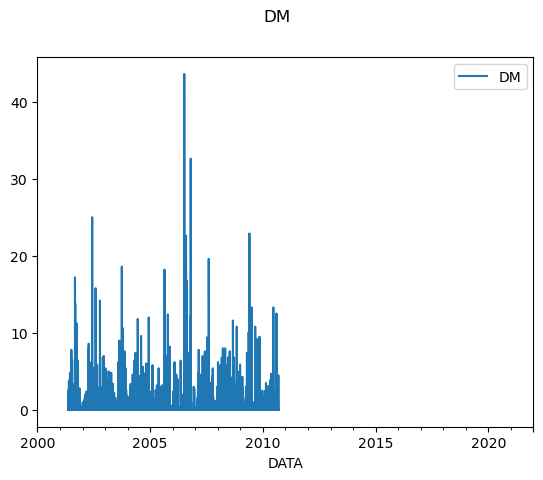

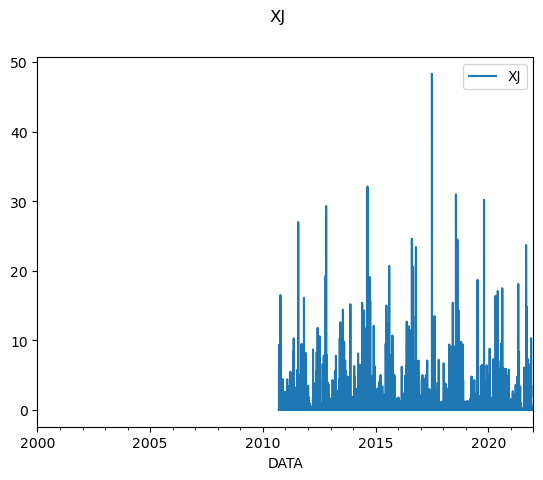

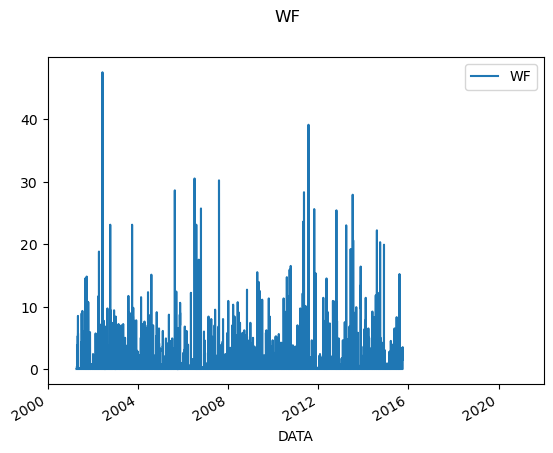

In [45]:
DM.plot(title="DM", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()
XJ.plot(title="XJ", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()
WF.plot(title="WF", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()

In [94]:
DM.rename(columns = {'DM': "DM_XJ_WF"}, inplace = True)
XJ.rename(columns = {'XJ': "DM_XJ_WF"}, inplace = True)
WF.rename(columns = {'WF': "DM_XJ_WF"}, inplace = True)

DM_XJ = DM.combine_first(XJ)
DM_XJ_WF = DM_XJ.combine_first(WF)

DM_XJ_WF = DM_XJ_WF.loc[initial_date:final_date]
DM_XJ_WF = DM_XJ_WF.fillna(value=0)

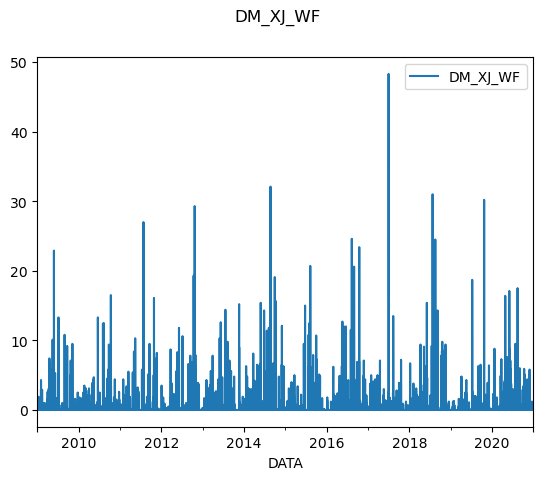

In [85]:
DM_XJ_WF.plot(title="DM_XJ_WF", subplots=True)    
plt.show()

#### Z4 + ZC

In the union of these two datasets, there is a gap of about 8 days. Data for these days is borrowed from another nearby station (DG).

In [48]:
Z4 = readData("Sr_15125_Z4.xlsx", path)
ZC = readData("Sr_15125_ZC.xlsx", path)
DG = readData("Sr_15125_DG.xlsx", path)

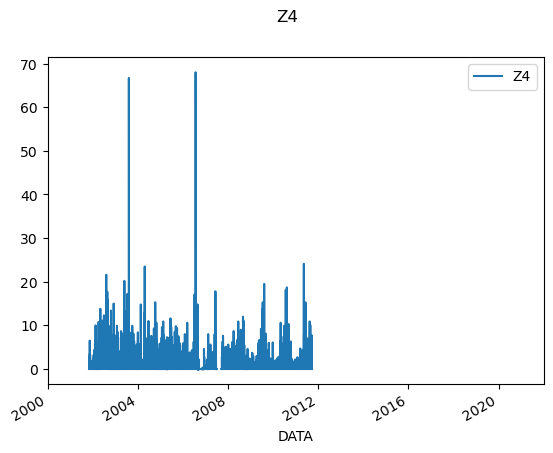

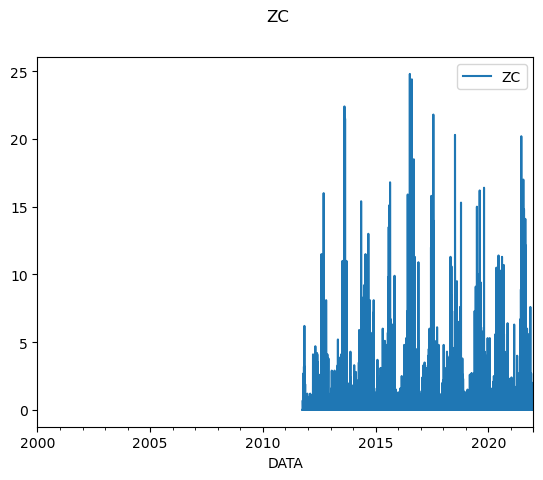

In [49]:
Z4.plot(title="Z4", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()
ZC.plot(title="ZC", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()

In [ ]:
Z4.rename(columns = {'Z4': "Z4_ZC"}, inplace = True)
ZC.rename(columns = {'ZC': "Z4_ZC"}, inplace = True)
DG.rename(columns = {'DG': "Z4_ZC"}, inplace = True)

Z4_ZC = ZC.combine_first(Z4)
Z4_ZC = Z4_ZC.combine_first(DG)

Z4_ZC = Z4_ZC.loc[initial_date:final_date]

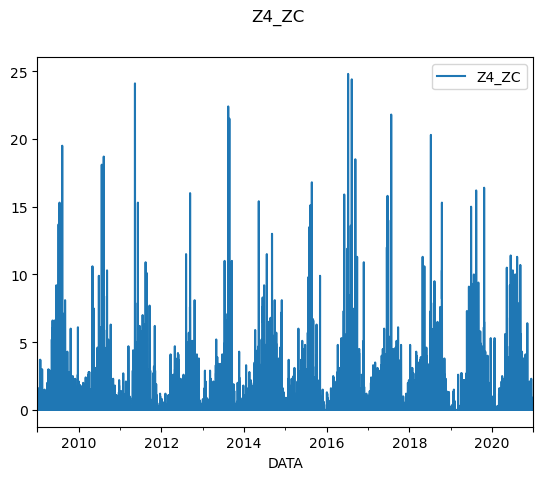

In [87]:
Z4_ZC.plot(title="Z4_ZC", subplots=True)    
plt.show()

### Stations with several hourly samples
We divide the PPT count by a half and assign each half to consecutive samples.


In [157]:
def upsample(df):
    df=df.resample("30T").asfreq()
    df=df.loc[initial_date:final_date] # global vars: initial_date and final_date
    
    indNaNs=np.where(df.isnull())[0]
    assert len(np.intersect1d(indNaNs,indNaNs+1)) == 0 # only NaNs because of upsampling

    sum_prev = df.sum()
    
    df.iloc[indNaNs,0] = df.iloc[indNaNs+1,0]/2
    df.iloc[indNaNs+1,0] = df.iloc[indNaNs+1,0]/2

    sum_post = df.sum()
    
    assert abs(sum_prev.values[0] - sum_post.values[0])<0.1 # total precipitation is not changed
    assert np.sum(df.isnull()).values[0]==0 # no remaining null value
    
    return df

In [156]:
#"UB", "UN", "UO", "V3", "V4", "V5", "VN", "WS"
UB = upsample(readData("Sr_15125_UB.xlsx", path))
UN = upsample(readData("Sr_15125_UN.xlsx", path))
UO = upsample(readData("Sr_15125_UO.xlsx", path))
V3 = upsample(readData("Sr_15125_V3.xlsx", path))
V4 = upsample(readData("Sr_15125_V4.xlsx", path))
V5 = upsample(readData("Sr_15125_V5.xlsx", path))
VN = upsample(readData("Sr_15125_VN.xlsx", path))
WS = upsample(readData("Sr_15125_WS.xlsx", path))

7921.5999999999985 7921.5999999999985
12451.799999999997 12451.799999999997


### Rest of stations: no preprocessing required

In [161]:
#CC	CG	CI	CY	DG	DJ	DN
CC = readData("Sr_15125_CC.xlsx", path)
CG = readData("Sr_15125_CG.xlsx", path)
CI = readData("Sr_15125_CI.xlsx", path)
CY = readData("Sr_15125_CY.xlsx", path)
DG = readData("Sr_15125_DG.xlsx", path)
DJ = readData("Sr_15125_DJ.xlsx", path)
DN = readData("Sr_15125_DN.xlsx", path)

CC=CC.loc[initial_date:final_date]
CG=CG.loc[initial_date:final_date]
CI=CI.loc[initial_date:final_date]
CY=CY.loc[initial_date:final_date]
DG=DG.loc[initial_date:final_date]
DJ=DJ.loc[initial_date:final_date]
DN=DN.loc[initial_date:final_date]

### Final DataFrame

In [162]:
df = pd.DataFrame({'DATA':pd.date_range('2009/01/01', '2021/01/01', freq='30T')}).set_index('DATA')

In [164]:
ArrayWithStations = [KE, UB, UN, UO, V3, V4, V5, VN, WS, DM_XJ_WF, Z4_ZC, CC, CG, CI, CY, DG, DJ, DN]
for station in ArrayWithStations:
    df = df.join(station, how='left')

In [2]:
# Smoothing
df = df.rolling(window=5, center=True, min_periods=5//2).mean()

In [12]:
df = df.round(2)
df["DATA"] = pd.date_range('2009/01/01', '2021/01/01', freq='30T')
df = df.set_index('DATA')
df

KE   UB   UN   UO   V3   V4   V5   VN   WS  DM_XJ_WF  \
DATA                                                                         
2009-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2009-01-01 00:30:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2009-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2009-01-01 01:30:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2009-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
2020-12-31 22:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2020-12-31 22:30:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2020-12-31 23:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2020-12-31 23:30:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   
2021-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0   

                     Z4_ZC   CC   CG   CI   CY   DG   DJ   DN  
DATA                                                           
2009-01-01 00:00:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-01-01 00:30:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-01-01 01:00:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-01-01 01:30:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009-01-01 02:00:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                    ...  ...  ...  ...  ...  ...  ...  ...  
2020-12-31 22:00:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-12-31 22:30:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-12-31 23:00:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-12-31 23:30:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2021-01-01 00:00:00    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[210385 rows x 18 columns]

In [13]:
df.to_excel("rawdata/SMC/SMC.xlsx")

<AxesSubplot:xlabel='DATA'>

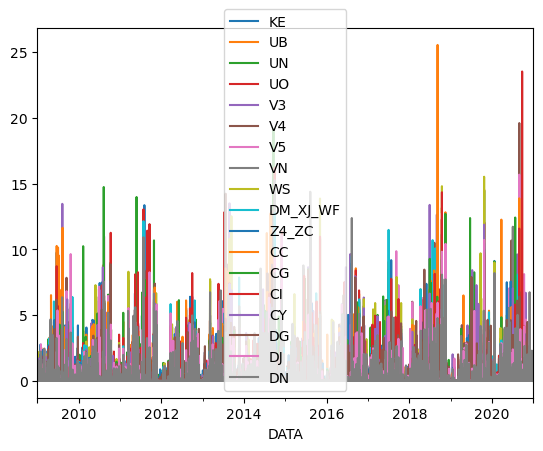

In [14]:
df.plot()